# Real Estate Price Analysis and Prediction

## Importing Libraries
This section imports essential libraries:
- **pandas** and **numpy** for data manipulation and numerical operations.
- **matplotlib** and **seaborn** for data visualization.
- **train_test_split** from `sklearn.model_selection` to split data into training and testing sets.
- **Ridge** and **RandomForestRegressor** from `sklearn.linear_model` and `sklearn.ensemble` respectively for regression modeling.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [49]:
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

--2024-09-20 12:29:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2673776 (2.5M) [text/csv]
Saving to: ‘kc_house_data_NaN.csv.1’

kc_house_data_NaN.c 100%[===================>]   2.55M  14.9MB/s    in 0.2s    

2024-09-20 12:29:23 (14.9 MB/s) - ‘kc_house_data_NaN.csv.1’ saved [2673776/2673776]



In [50]:
df = pd.read_csv('kc_house_data_NaN.csv')
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [52]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [53]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


## Preprocessing

To make the data usable and analysable, following things were done:
- Dropped the unwanted and irrelevant column **`Unnamed: 0`**
- Changed the data type of **date** from **object** to **datetime** type.
- Replaced null values in **bedroom** and **bathroom** column to mean value of entire column.
- **Rounded up** the bedrooms, floors and bathrooms values to zero decimal, because bedrooms should be integers and not float.

In [54]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [55]:
df['date'] = pd.to_datetime(df['date'])

In [56]:
df['bedrooms'].unique(), df['bathrooms'].unique()

(array([ 3.,  2.,  4.,  5.,  1.,  6.,  7., nan,  8.,  9., 11., 10., 33.]),
 array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
        3.5 , 0.75, 4.75, 5.  , 4.25, 3.75,  nan, 1.25, 5.25, 6.  , 0.5 ,
        5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ]))

In [57]:
df['bedrooms'].replace(np.nan, df['bedrooms'].mean().round(0), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean().round(0), inplace=True)
df['bathrooms'] = df['bathrooms'].round(0)

In [58]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [59]:
df['bedrooms'].unique(), df['bathrooms'].unique()

(array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.]),
 array([1., 2., 3., 4., 5., 6., 0., 7., 8.]))

In [60]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [61]:
df['floors'] = df['floors'].round(0)
df['floors'].unique()

array([1., 2., 3., 4.])

# Analysis

Now that data is ready to be analyzed. We will check **relations** of each **attribute** against **price** and also relation among **every attribute**.

In [62]:
df.corr()['price']

,price
id,-0.016762
date,-0.004357
price,1.000000
bedrooms,0.308868
bathrooms,0.519498
sqft_living,0.702035
sqft_lot,0.089661
floors,0.244906
waterfront,0.266369
view,0.397293


The above given correlation suggests high strength of following attributes against price of a property:
- Number of Bedrooms
- Number of Bathrooms
- Area in Square Feet
- View
- Waterfront
- Floors
- Location (Longitude and Latitude)

Now lets check the trends of Area covered by property against price.

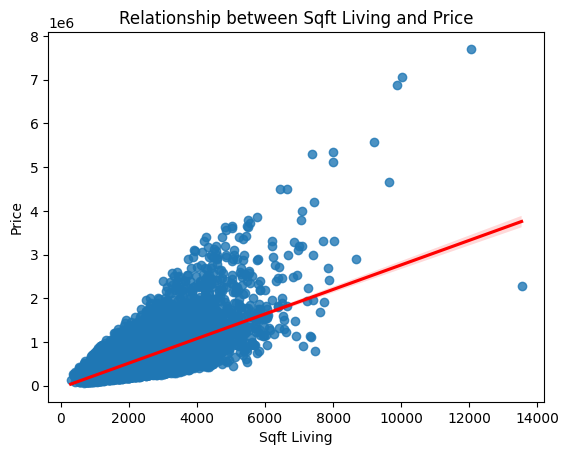

In [63]:
sns.regplot(x='sqft_living', y='price', data=df, line_kws={'color': 'red'})
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

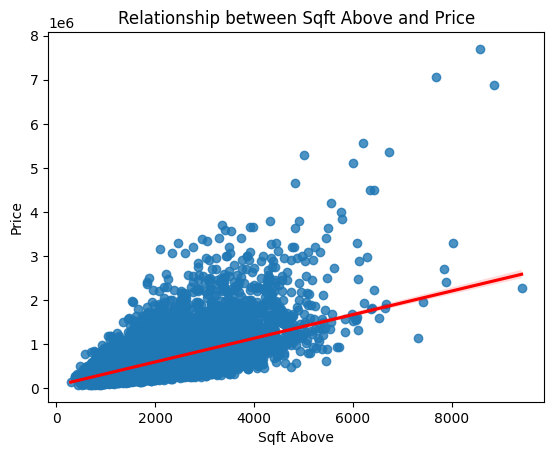

In [64]:
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color': 'red'})
plt.title('Relationship between Sqft Above and Price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

It is obvious from graph as well as from common sense that as area increases, the price increases.

No we will check distribution of bedrooms, bathrooms and floors in our dataset.

In [65]:
df['bedroom_bins'] = pd.cut(df['bedrooms'],
                            bins=[0, 1, 2, 3, 4, 5, float('inf')],
                            labels=['1', '2', '3', '4', '5', '5+'])

<ipython-input-66-562faacf3779>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedroom_bins', data=df, palette='Set2')


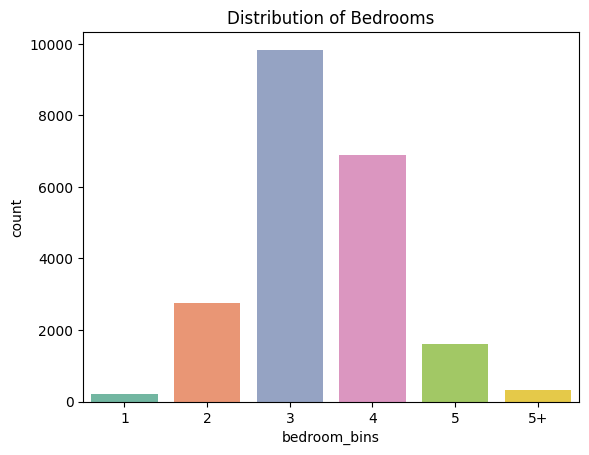

In [66]:
sns.countplot(x='bedroom_bins', data=df, palette='Set2')
plt.title('Distribution of Bedrooms')
plt.show()

In [67]:
df['bathrooms_bins'] = pd.cut(df['bathrooms'],
                            bins=[0, 1, 2, 3, 4, float('inf')],
                            labels=['1', '2', '3', '4', '4+'])

<ipython-input-68-753ab25b6c2d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms_bins', data=df, palette='Set2')


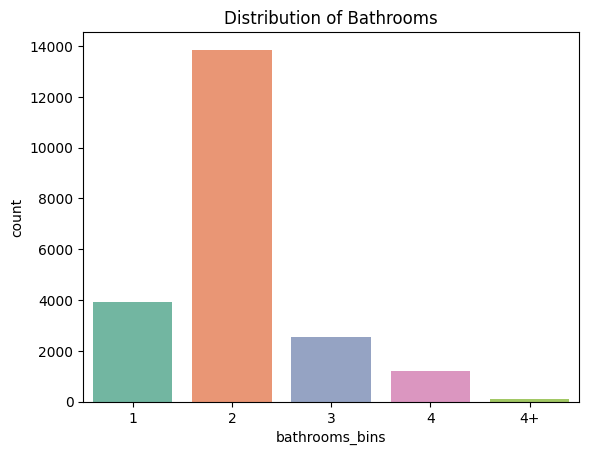

In [68]:
sns.countplot(x='bathrooms_bins', data=df, palette='Set2')
plt.title('Distribution of Bathrooms')
plt.show()

<ipython-input-69-57e029caf023>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='floors', data=df, palette='Set2')


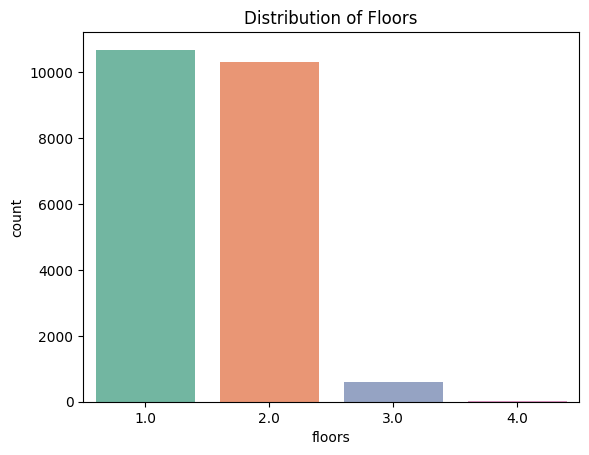

In [69]:
sns.countplot(x='floors', data=df, palette='Set2')
plt.title('Distribution of Floors')
plt.show()

Now we will observe relation between waterfront, view and basement against price of a property.

<ipython-input-70-e0ebd42a8f77>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='waterfront', y='price', data=df, palette='dark')


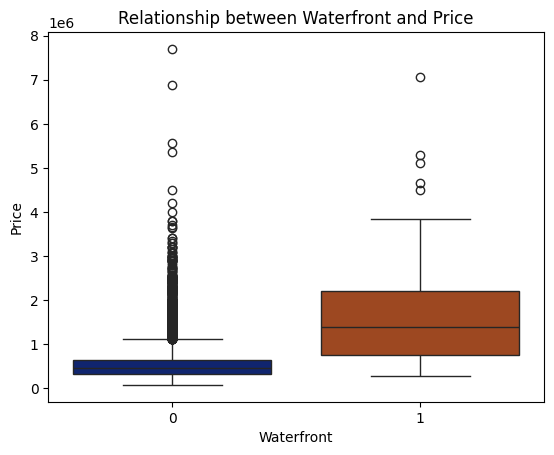

In [70]:
sns.boxplot(x='waterfront', y='price', data=df, palette='dark')
plt.title('Relationship between Waterfront and Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

In [71]:
df['has_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

<ipython-input-72-48f8611bd75e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_basement', data=df, palette='deep')


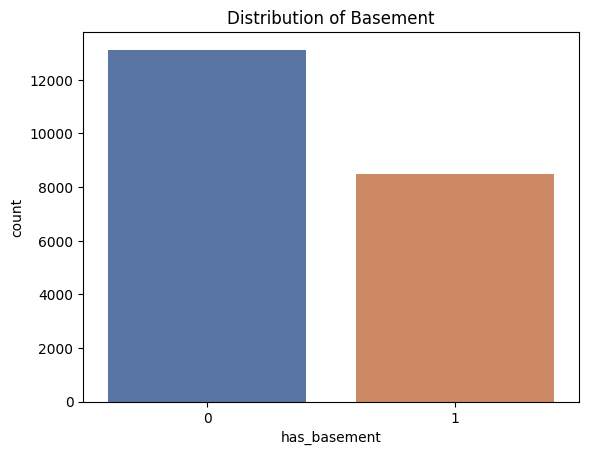

In [72]:
sns.countplot(x='has_basement', data=df, palette='deep')
plt.title('Distribution of Basement')
plt.show()

<ipython-input-73-194c8cf26b6b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_basement', y='price', data=df, palette='muted')


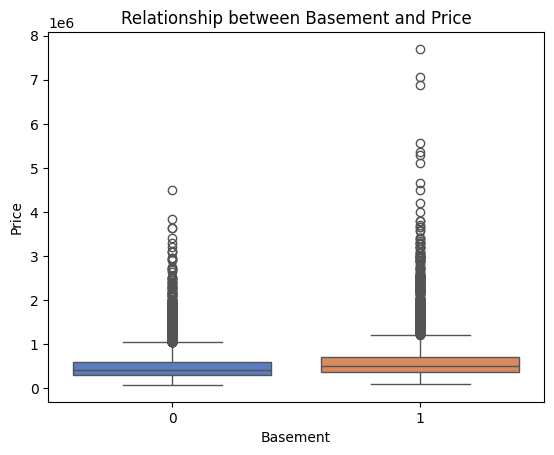

In [73]:
sns.boxplot(x='has_basement', y='price', data=df, palette='muted')
plt.title('Relationship between Basement and Price')
plt.xlabel('Basement')
plt.ylabel('Price')
plt.show()

<ipython-input-74-2a2b7a35c892>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='view', y='price', data=df, palette='deep')


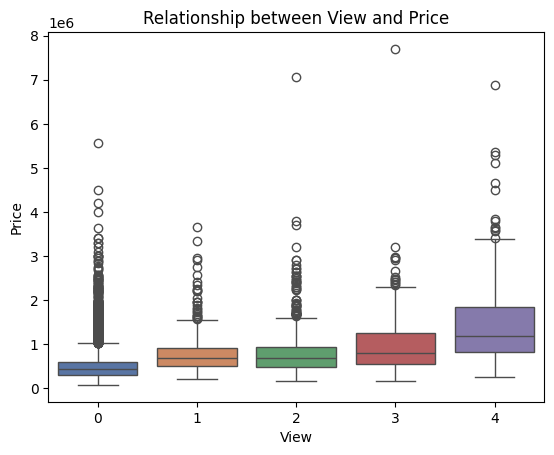

In [74]:
sns.boxplot(x='view', y='price', data=df, palette='deep')
plt.title('Relationship between View and Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

The above boxplots suggest that:
- **Waterfront**: The properties with waterfront have higher prices as compared to those with no waterfront.
- **Basement**: We see a slight higher prices of properties with basement.
- **View**: Also a better view plays important role in increasing prices.

Plotting correlation matrix to find inter-dependancies between attributes other than price.

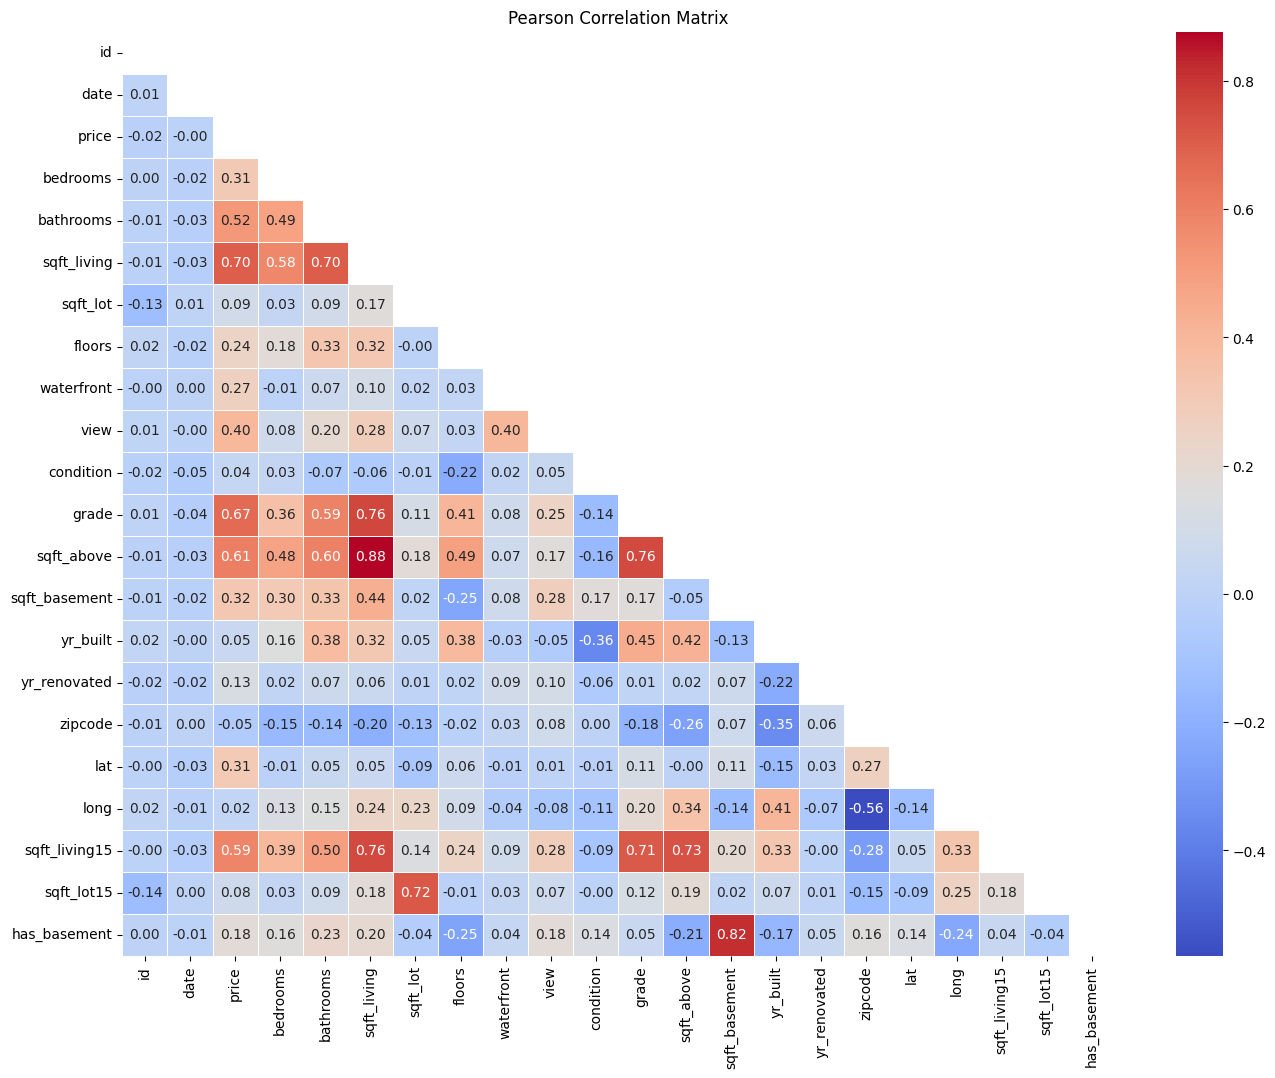

In [75]:
df_cor = df.drop(['bedroom_bins', 'bathrooms_bins'], axis=1).corr()
mask = np.triu(np.ones_like(df_cor, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(df_cor, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()


From above matrix we observe that:
- `sqft_living`, `sqft_lot15`, `sqft_living15`, `sqft_living` and `sqft_above` are all interdependant. So we can use only one of them for modelling.
- Since there is less or negative relation to price for `zipcode`, so we can discard that aswell.

# Modelling

We will check multiple models and see which best fits our data.

### 1. Input and target data split.

In [76]:
x_data = df.drop(['price', 'id', 'sqft_living15', 'sqft_lot15', 'zipcode', 'sqft_above', 'date',
                  'bedroom_bins', 'bathrooms_bins', 'has_basement'], axis=1)
y_data = df['price']

In [77]:
x_data.head(), y_data.head()

(   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0       3.0        1.0         1180      5650     1.0           0     0   
 1       3.0        2.0         2570      7242     2.0           0     0   
 2       2.0        1.0          770     10000     1.0           0     0   
 3       4.0        3.0         1960      5000     1.0           0     0   
 4       3.0        2.0         1680      8080     1.0           0     0   
 
    condition  grade  sqft_basement  yr_built  yr_renovated      lat     long  
 0          3      7              0      1955             0  47.5112 -122.257  
 1          3      7            400      1951          1991  47.7210 -122.319  
 2          3      6              0      1933             0  47.7379 -122.233  
 3          5      7            910      1965             0  47.5208 -122.393  
 4          3      8              0      1987             0  47.6168 -122.045  ,
 0    221900.0
 1    538000.0
 2    180000.0
 3    604000.0
 

### 2. Linear Regression

In [78]:
model = LinearRegression()
model.fit(x_data, y_data)
print('Model Score: ', model.score(x_data, y_data))

Model Score:  0.6950332082554063


### 3. Pipelining Linear, Polynomial Regression

In [79]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_data, y_data)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
preds = pipe.predict(x_data)
print('Model Score: ', pipe.score(x_data, y_data))

Model Score:  0.8018184362568617


We see that **pipeline** provides a better score while fitting onto our data with **80.1% score**.

# Model Refinement

Now we will refine our models to work best on unseen data as well.

### 1. Train-Test Split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17290, 14), (4323, 14), (17290,), (4323,))

### 2. Polynomial Regression Comparison with multiple degrees

In [82]:
rsqutrain = []
rsqutest = []

for n in range(1,5):
  model = PolynomialFeatures(degree=n)
  x_train_poly = model.fit_transform(x_train)
  x_test_poly = model.fit_transform(x_test)
  mod = LinearRegression()
  mod.fit(x_train_poly, y_train)
  rsqutrain.append(mod.score(x_train_poly, y_train))
  rsqutest.append(mod.score(x_test_poly, y_test))

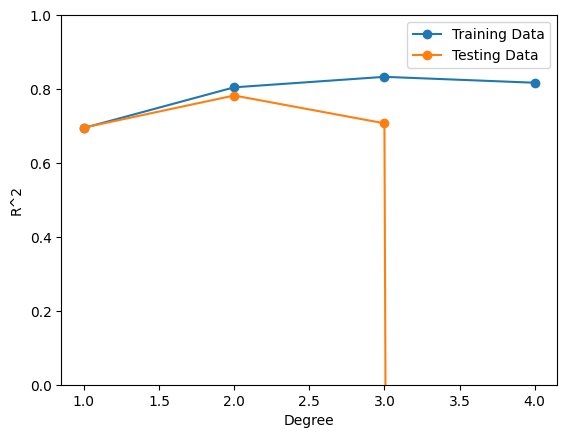

In [83]:
plt.plot(range(1,5), rsqutrain, 'o-', label='Training Data')
plt.plot(range(1,5), rsqutest, 'o-', label='Testing Data')
plt.xlabel('Degree')
plt.ylabel('R^2')
plt.legend()
plt.ylim(0,1)
plt.show()

In [84]:
model = PolynomialFeatures(degree=2)
x_train_poly = model.fit_transform(x_train)
x_test_poly = model.fit_transform(x_test)
mod = LinearRegression()
mod.fit(x_train_poly, y_train)
print('Train Score: ', mod.score(x_train_poly, y_train))
print('Test Score: ', mod.score(x_test_poly, y_test))

Train Score:  0.8046289435441389
Test Score:  0.7825104821827091


We observe that the best train and test accuracy is obtained with 2nd degree polynomial regression.

### 3. Ridge Regression with multiple values of alpha.

In [85]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
rsquare_train = []
rsquare_test = []

for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train_poly, y_train)
  rsquare_train.append(model.score(x_train_poly, y_train))
  rsquare_test.append(model.score(x_test_poly, y_test))
  print('Alpha: ', alpha)
  print('Train Score: ', model.score(x_train_poly, y_train))
  print('Test Score: ', model.score(x_test_poly, y_test))

Alpha:  0.001
Train Score:  0.8038289055192882
Test Score:  0.781707541815694
Alpha:  0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.08337e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.05763e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.07109e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Score:  0.8025139107325696
Test Score:  0.7802518205066997
Alpha:  0.1
Train Score:  0.8014217517993065
Test Score:  0.7789955985904629
Alpha:  1
Train Score:  0.8005516022986342
Test Score:  0.7776874374632335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.06073e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.06518e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.48525e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Alpha:  10
Train Score:  0.7944881158153303
Test Score:  0.770572002732687
Alpha:  100
Train Score:  0.788318834521182
Test Score:  0.7651075007357329
Alpha:  1000
Train Score:  0.7855823755140594
Test Score:  0.7632265839996145


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.69952e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


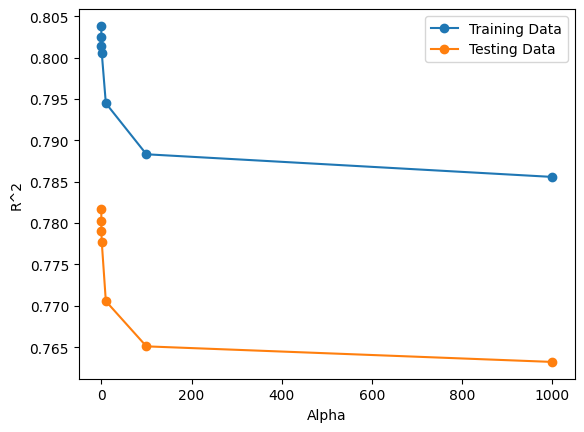

In [86]:
plt.plot(alphas, rsquare_train, 'o-', label='Training Data')
plt.plot(alphas, rsquare_test, 'o-', label='Testing Data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()

We observe that at `alpha=0.01` we get the best test and training accuracy.

### 4. Grid Search

In [87]:
models = [Ridge(), RandomForestRegressor()]

paramgrid = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             {'n_estimators': [50, 100, 200]}]

for model, param in zip(models, paramgrid):
  grid = GridSearchCV(model, param, cv=5)
  grid.fit(x_train, y_train)
  ber = grid.best_estimator_
  print('Model: ', model)
  print('Train Score: ', ber.score(x_train, y_train))
  print('Test Score: ', ber.score(x_test, y_test))

Model:  Ridge()
Train Score:  0.6946340803619412
Test Score:  0.6956425909238464
Model:  RandomForestRegressor()
Train Score:  0.9814222665442255
Test Score:  0.8651069292031927


The printed output shows the models' performance scores:

- **Ridge** model:
   - Train Score: 0.6946
   - Test Score: 0.6956
- **RandomForestRegressor**:
  - Train Score: 0.9829
  - Test Score: 0.8581

The results indicate that the **RandomForestRegressor** performed better on both the training and testing sets compared to the Ridge regression model.